# Data Loading and Inspection

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [64]:
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [65]:
df.head(5)

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       48204 non-null  int64  
 1   holiday              61 non-null     object 
 2   temp                 48204 non-null  float64
 3   rain_1h              48204 non-null  float64
 4   snow_1h              48204 non-null  float64
 5   clouds_all           48204 non-null  int64  
 6   weather_main         48204 non-null  object 
 7   weather_description  48204 non-null  object 
 8   date_time            48204 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [67]:
df.shape

(48204, 9)

In [68]:
categorial_cols = df.select_dtypes(exclude="number")
numerical_cols = df.select_dtypes(include="number")

In [69]:
numerical_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
traffic_volume,48204.0,3259.818355,1986.860670,0.0,1193.00,3380.00,4933.000,7280.00
temp,48204.0,281.205870,13.338232,0.0,272.16,282.45,291.806,310.07
rain_1h,48204.0,0.334264,44.789133,0.0,0.00,0.00,0.000,9831.30
snow_1h,48204.0,0.000222,0.008168,0.0,0.00,0.00,0.000,0.51
clouds_all,48204.0,49.362231,39.015750,0.0,1.00,64.00,90.000,100.00


In [70]:
categorial_cols.describe().T

,count,unique,top,freq
holiday,61,11,Labor Day,7
weather_main,48204,11,Clouds,15164
weather_description,48204,38,sky is clear,11665
date_time,48204,40575,19-05-2013 10:00,6


# Data Cleaning

Converting Tempreture to Celsius

In [71]:
df['temp'] = df['temp'] - 273
df['temp']

0        15.28
1        16.36
2        16.58
3        17.13
4        18.14
         ...  
48199    10.45
48200     9.76
48201     9.73
48202     9.09
48203     9.12
Name: temp, Length: 48204, dtype: float64

In [72]:
df['holiday'] = df['holiday'].fillna("None")

In [73]:
df.isna().sum()

traffic_volume         0
holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
dtype: int64

In [74]:
df.duplicated().sum()

np.int64(17)

In [75]:
df.drop_duplicates(inplace=True)

In [76]:
df['weather_description']=df['weather_description'].str.title()

# EDA

<Axes: >

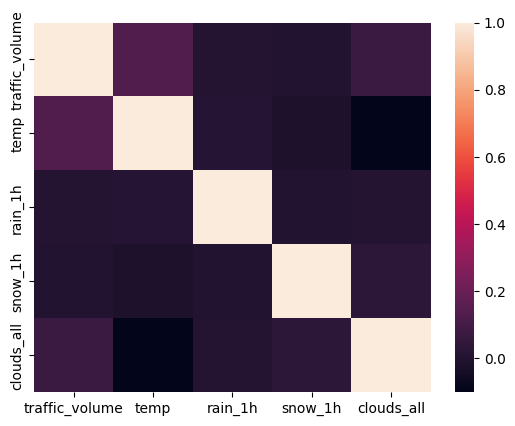

In [77]:
sns.heatmap(numerical_cols.corr())

In [78]:
holidays_df = df.loc[df['holiday'] != 'None']
holidays_df

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
126,455,Columbus Day,0.080,0.00,0.0,20,Clouds,Few Clouds,08-10-2012 00:00
1123,1000,Veterans Day,15.120,0.00,0.0,87,Clear,Sky Is Clear,12-11-2012 00:00
1370,919,Thanksgiving Day,5.540,0.00,0.0,20,Mist,Mist,22-11-2012 00:00
2360,803,Christmas Day,-8.600,0.00,0.0,90,Clouds,Overcast Clouds,25-12-2012 00:00
2559,1439,New Years Day,-9.510,0.00,0.0,58,Clouds,Broken Clouds,01-01-2013 00:00
...,...,...,...,...,...,...,...,...,...
44441,1088,Memorial Day,26.487,0.00,0.0,24,Clouds,Few Clouds,28-05-2018 00:00
45547,1021,Independence Day,24.550,0.00,0.0,1,Mist,Mist,04-07-2018 00:00
46936,596,State Fair,16.020,0.00,0.0,1,Clear,Sky Is Clear,23-08-2018 00:00
47330,962,Labor Day,19.430,0.25,0.0,1,Rain,Light Rain,03-09-2018 00:00


In [79]:
holidays_df['holiday']

126          Columbus Day
1123         Veterans Day
1370     Thanksgiving Day
2360        Christmas Day
2559        New Years Day
               ...       
44441        Memorial Day
45547    Independence Day
46936          State Fair
47330           Labor Day
47331           Labor Day
Name: holiday, Length: 61, dtype: object

dropping extreme values (outliers)

In [80]:
df.loc[df['temp'] < -50]

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
11898,361,None,-273.0,0.0,0.0,0,Clear,Sky Is Clear,31-01-2014 03:00
11899,734,None,-273.0,0.0,0.0,0,Clear,Sky Is Clear,31-01-2014 04:00
11900,2557,None,-273.0,0.0,0.0,0,Clear,Sky Is Clear,31-01-2014 05:00
11901,5150,None,-273.0,0.0,0.0,0,Clear,Sky Is Clear,31-01-2014 06:00
11946,291,None,-273.0,0.0,0.0,0,Clear,Sky Is Clear,02-02-2014 03:00
11947,284,None,-273.0,0.0,0.0,0,Clear,Sky Is Clear,02-02-2014 04:00
11948,434,None,-273.0,0.0,0.0,0,Clear,Sky Is Clear,02-02-2014 05:00
11949,739,None,-273.0,0.0,0.0,0,Clear,Sky Is Clear,02-02-2014 06:00
11950,962,None,-273.0,0.0,0.0,0,Clear,Sky Is Clear,02-02-2014 07:00
11951,1670,None,-273.0,0.0,0.0,0,Clear,Sky Is Clear,02-02-2014 08:00


In [81]:
df = df.loc[df['temp'] > -50]


In [82]:
df['temp']

0        15.28
1        16.36
2        16.58
3        17.13
4        18.14
         ...  
48199    10.45
48200     9.76
48201     9.73
48202     9.09
48203     9.12
Name: temp, Length: 48177, dtype: float64

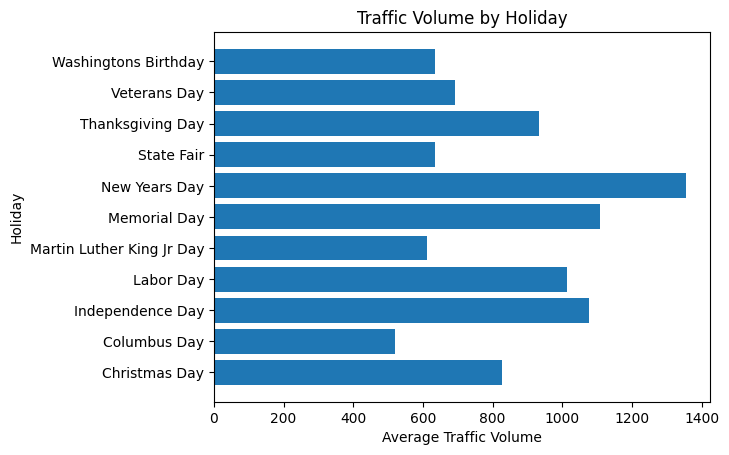

In [83]:
holiday_avg = holidays_df.groupby('holiday')['traffic_volume'].mean()

plt.barh(holiday_avg.index, holiday_avg.values)
plt.xlabel("Average Traffic Volume")
plt.ylabel("Holiday")
plt.title("Traffic Volume by Holiday")
plt.show()


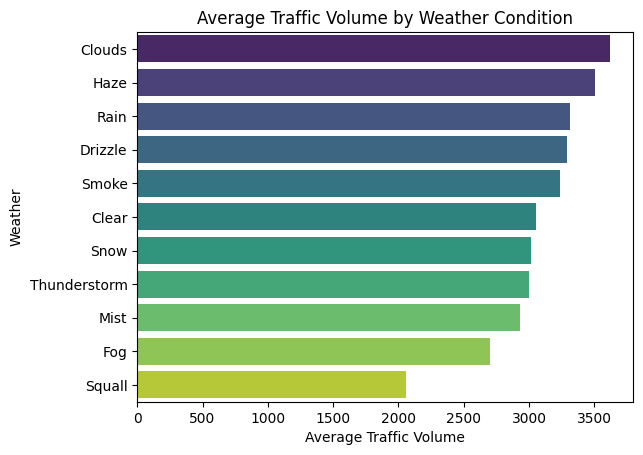

In [84]:
weather_avg = df.groupby('weather_main')['traffic_volume'].mean().reset_index()

# Sort for better readability
weather_avg = weather_avg.sort_values('traffic_volume', ascending=False)

# Plot
sns.barplot(data=weather_avg, x='traffic_volume', y='weather_main', palette='viridis')
plt.title("Average Traffic Volume by Weather Condition")
plt.xlabel("Average Traffic Volume")
plt.ylabel("Weather")
plt.show()

## Traffic Over Time

In [85]:
df['date_time'] = pd.to_datetime(df['date_time'], dayfirst=True)  # ensure datetime type



In [86]:
df_2015 = df.loc[df['date_time'].dt.year == 2015]


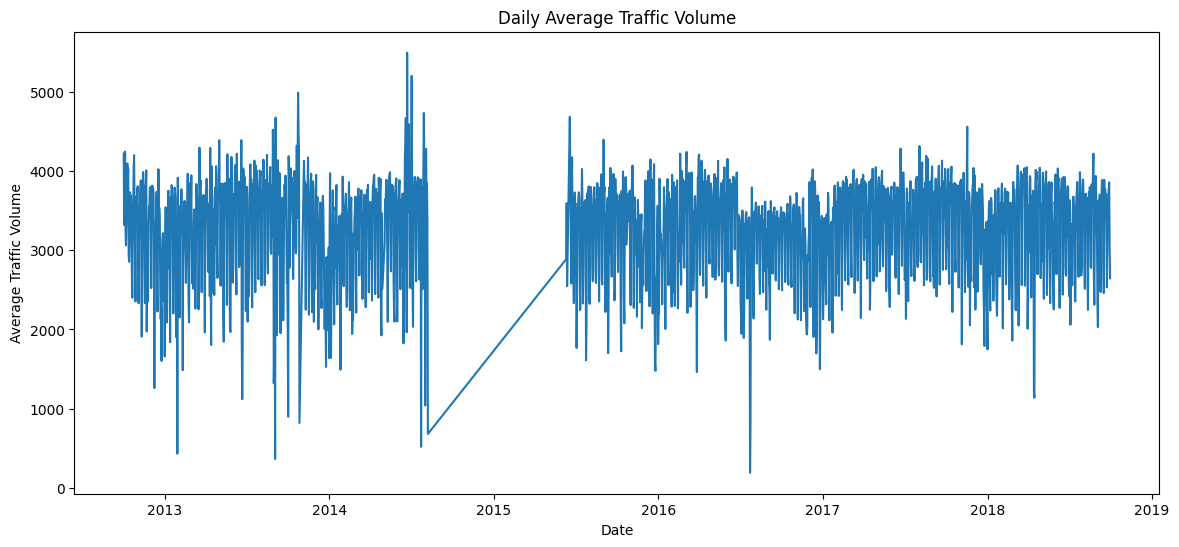

In [87]:
df.set_index('date_time', inplace=True)

daily_avg = df.resample('D')['traffic_volume'].mean().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=daily_avg, x='date_time', y='traffic_volume')
plt.title("Daily Average Traffic Volume")
plt.xlabel("Date")
plt.ylabel("Average Traffic Volume")
plt.show()


Inspecting The Gap

In [88]:
df_2014 = df[df.index.year == 2014]

df_2014.index.min(), df_2014.index.max(), len(df_2014)


(Timestamp('2014-01-01 00:00:00'), Timestamp('2014-08-08 01:00:00'), 4829)

In [89]:
df_2015['date_time'].min(), df_2015['date_time'].max(), len(df_2015)


(Timestamp('2015-06-11 20:00:00'), Timestamp('2015-12-31 23:00:00'), 4372)

`Data has got missing values between the 8th of August, 2014 and 11th of June, 2015.`

### Traffic's Peak Through the Day

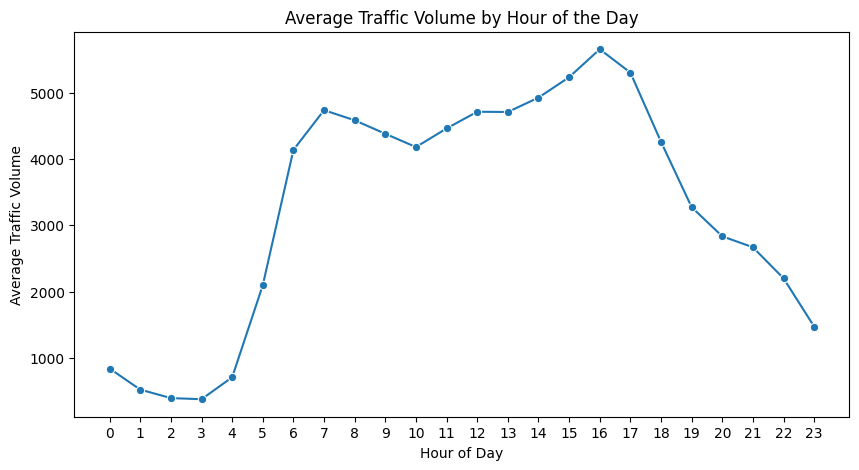

In [90]:
df['hour'] = df.index.hour
hour_of_day_avg = df.groupby('hour')['traffic_volume'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=hour_of_day_avg, x='hour', y='traffic_volume', marker='o')
plt.title("Average Traffic Volume by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Traffic Volume")
plt.xticks(range(0, 24))
plt.show()
